---
## Title: "Germany Automobile Manufacturers' Stock Market Analysis"
author: 
  - Aiman Alam  
date: 2022-12-01  


# Introduction

For this project, we are going to analyze Stock Market data for four Germany car manufacturers namely Mercedes-Benz Group AG (MBGAF), Bayerische Motoren Werke Aktiengesellschaft (BMWYY), Volkswagen AG (VWAGY), and Porsche Automobil Holding SE (POAHY) using stock market data from Yahoo Finance webpage. Yahoo! Finance is a media property that is part of the Yahoo! Network. It offers financial news, data and commentary, including stock quotes, press releases, financial reports and original content. It also offers some online personal finance management tools

To complete our tasks we will use Python Jupyter notebook packages to copy/extract and analyze, visualise the stock market data. Furthermore we will look at different ways to analyze the risk of a stock (car manufacturer), based on its performance history.

# QUESTIONS

**1.** 
   >**a.** We would like to know what is the change in a stock price over time?<br> **b.** What was the moving average of various stocks? <br><br>

**2.** 
   >**a.** what was the daily return average of a stock?<br>**b.** What was the correlation between daily returns of a car manufacturer's stocks?<br><br>

**3.**
   >**a.** Also as Capital Markets investors how much value do we put at risk by investing in a particular car manufacturer's      stock?<br>    **b.** How can we attempt to predict future stock behaviour?<br>


### Data

#### Importing important packages

In [1]:
#Importing important packages
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#For us to grab stock market data from Yahoo Finance we import the following:
from pandas_datareader import DataReader
from datetime import datetime
import pandas_datareader.data as web


Defining our data

In [2]:
!pip install yfinance


In [3]:
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override() 

# download dataframe
# The tech stocks we'll use for this analysis
Car_Manufacturers = ['MBGAF','BMWYY','VWAGY','POAHY']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


#For loop for grabing yahoo finance data and setting as a dataframe

for stock in Car_Manufacturers:   
# Set DataFrame as the Stock Ticker

      globals()[stock] = pdr.get_data_yahoo(stock, start, end)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Now lets see what we have done so far with our data, and have a look at the column values for each car (the first 3 rows).

#### DESCRIPTION 

The `Open price` is the first price a stock trades at during the day. For active stocks that price will likely be set right at the market open, which occurs at 9:30am Eastern Standard Time.

The `High` represents a stock's highest trading price for the day. Low. The `Low` is a stock's lowest trading price for the day.

The `Close` -  closing price is the raw price, which is just the cash value of the last transacted price before the market closes.

`Volume` is the physical number of shares traded of that stock (not dollar amount) for your given period of time.

The `Adjusted close` is the closing price adjusted for splits and dividend distributions. It factors in anything that might affect the stock price after the market closes

In [4]:
MBGAF.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-14,85.769997,85.769997,84.910004,85.410004,78.894630,11500
2022-01-18,84.839996,84.970001,84.199997,84.199997,77.776932,17500
2022-01-19,85.000000,85.500000,84.180000,84.379997,77.943199,13600


In [5]:
BMWYY.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-14,37.770000,38.090000,37.680000,37.990002,35.234741,41500
2022-01-18,37.759998,37.759998,37.349998,37.450001,34.733902,88400
2022-01-19,37.560001,37.560001,36.860001,37.000000,34.316540,58200


In [6]:
VWAGY.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-14,31.180000,31.709999,31.080000,31.590000,27.095135,580400
2022-01-18,30.549999,30.837000,30.070000,30.180000,25.885759,555900
2022-01-19,30.670000,30.700001,30.049999,30.190001,25.894337,258600


In [7]:
POAHY.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-14,10.01,10.15,10.00,10.12,9.766303,250500
2022-01-18,9.97,10.02,9.88,9.93,9.582944,408400
2022-01-19,10.06,10.08,9.87,9.87,9.525041,427400


**Observation**

*Note : The below observation of the cars stock prices is only for the dates 11th, 12th and 13th January 2023.*

It is observable that prices for BMWYY and VWAGY are almost in the same range, that is between 30 - 40. However, when they are compared with MBGAF or POAHY they show huge disparity. It can be observed that MBGAF stock price has been somewhere between 80 to 87 whereas stock price of POAHY have been quite low these days, between 9-11. 

In [8]:
#Basic stats for Mercedes-Benz Group AG's Stock
MBGAF.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,65.089601,65.809044,64.361116,65.128167,63.490009,33333.466135
std,8.562867,8.507818,8.452765,8.418608,6.852716,24617.353138
min,50.000000,51.310001,49.939999,50.709999,50.709999,7200.000000
25%,57.540001,58.170000,57.010000,57.925001,57.890001,18200.000000
50%,65.500000,66.150002,64.839996,65.699997,64.139999,26700.000000
75%,69.900002,70.529999,69.215000,69.869999,67.680000,38700.000000
max,87.000000,87.000000,85.559998,86.419998,79.827583,178200.000000


The ratio of supply to demand changes during a typical trading day as the stock's price becomes more and less desirable. Because of these variations, closing and opening prices are not always the same.

There are various other factors that might be resposible for different closing and opening prices of the stock. 

-  Sudden price movement in market few minutes before the market close.

-  Block deal window - means a large number of stock trade happening in a single order.

-  Post close session where within a given time period some trading takes place with the closing price. Now, if suppose there is a change in demand during this time period and a lot of stocks are bought, the opening price next day tend to move higher.

-  Corporate actions - these are pre-planned actions by investors like dividend and stock split and bonus shares.

-  Market sentiment and economic changes - it includes some favorable and unfavorable economic events which are genrally not under investors control. example, demonetization of currency notes.

In [9]:
#Some basic info about the Benz dataframe
MBGAF.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-01-14 to 2023-01-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


### Question  1  (a)    What's the change in stock's price over time?

<AxesSubplot:xlabel='Date'>

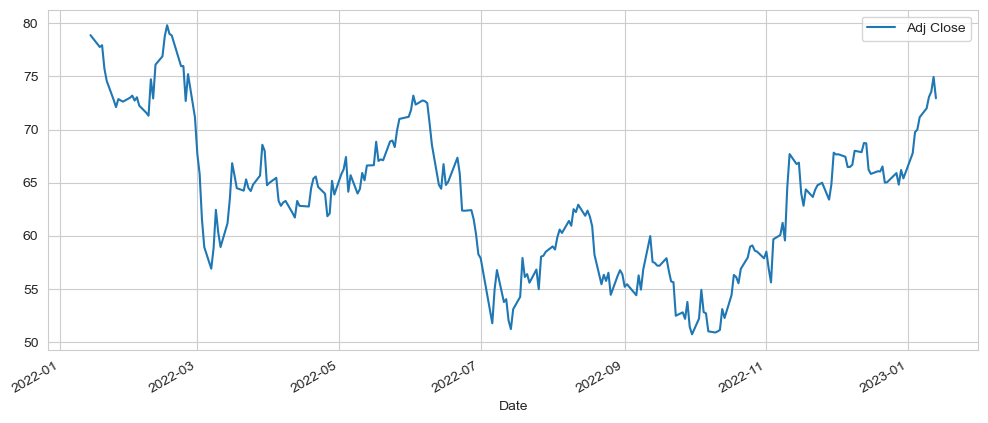

In [10]:
#Plotting the stock's adjusted closing price using pandas
MBGAF['Adj Close'].plot(legend=True,figsize=(12,5))

As we can observe above that the price have showed great variance throughout the year that is from january 2022 to january 2023. we can see that it started from near 78%-80% in january and upto march it was going very well. Hoever, in march , there was a very sudden drop right to 57%. We can though well support that drop with reason of Russia - Ukraine conflicts. This issue resulting in supply chain challenges, temporary store closures in Russia, higher oil prices, and a rising U.S. dollar thereby again adversly affecting stock prices in march.
By midway June price did showed a good rise to near about 74% but not for long before it dropped drastically in late july to 52%. Continuing at nearby same level, prices have shown a linear increase since October and is now trending at 75%.

Similarily, we can plot change in a stock's volume being traded, over time.

<AxesSubplot:xlabel='Date'>

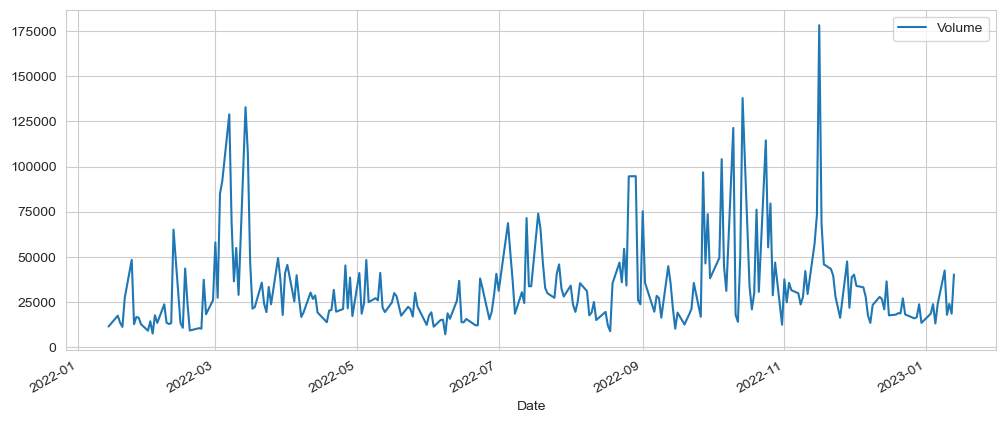

In [11]:
#Plotting the total volume being traded over time
MBGAF['Volume'].plot(legend=True,figsize=(12,5))


For stock volume we can observe that it has mostly maintained a uniform count of near about 15000 to 50000. However two major rise in stock purchase was oberved in March 2022 to about 125000 and in November 2022 to about 175000. 

### Question 1  (b)  What was the moving average of various stocks?

Let's check out the moving average for stocks over a 10, 20 and 50 day period of time. We'll add that information to the stock's dataframe.

In [12]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    MBGAF[column_name] = MBGAF['Adj Close'].rolling(window=ma,center=False).mean()

In [13]:
MBGAF.tail()

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2023-01-09,72.220001,72.550003,72.000000,72.000000,72.000000,42500,67.802,67.3500,64.9332
2023-01-10,72.660004,73.089996,72.309998,73.070000,73.070000,18000,68.605,67.6035,65.2228
2023-01-11,73.739998,73.739998,73.110001,73.559998,73.559998,24000,69.371,67.8880,65.5240
2023-01-12,74.430000,75.129997,73.699997,74.959999,74.959999,18600,70.386,68.1995,65.8658
2023-01-13,72.580002,73.000000,72.230003,72.949997,72.949997,40300,71.062,68.4120,66.1548



Here we observe the moving averages for 10, 20 and 50 days, Also, the high, low, open and close price of the stocks per day.
We can make various comparisons between the different prices for the same day. For example, lets consider 12th January 2023, we can evaluate that the closing was at higher price than opening although the difference is very minute. And if we compare the trend of high and close with opening and closing we observe that they followed the opposite pattern. The high price for the day was near 75 and lowest was near 73, so the difference is not very less. And we notice that all these 4 variables are following simlar pattern in the other dates as well. 

If we compare the moving average for 10, 20 and 50 days, we witness that they demostrate good disparity between themselves. For example, for 12th January MA10 days its somewhere around 70 but for MA50 its near 65.

Text(0, 0.5, 'Adj Close')

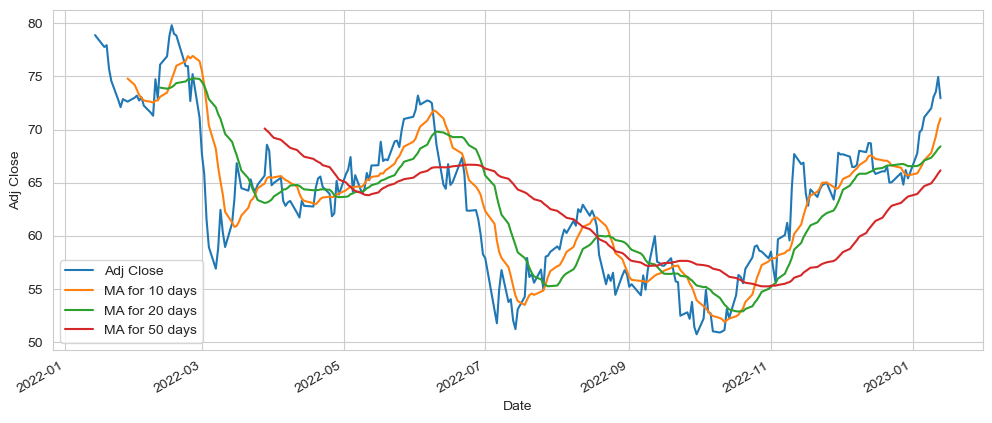

In [14]:
MBGAF[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,5))
plt.xlabel('Date')
plt.ylabel('Adj Close')

Moving averages for more days have a smoother plot, as they're less reliable on daily fluctuations. 



### Question 2 (a) What was the daily return average of a stock?

In [15]:
#The daily return column can be created by using the percentage change over the adjusted closing price
MBGAF['Daily Return'] = MBGAF['Adj Close'].pct_change()

In [16]:
MBGAF['Daily Return'].tail()

Date
2023-01-09    0.011804
2023-01-10    0.014861
2023-01-11    0.006706
2023-01-12    0.019032
2023-01-13   -0.026814
Name: Daily Return, dtype: float64

Text(0, 0.5, 'Daily Return')

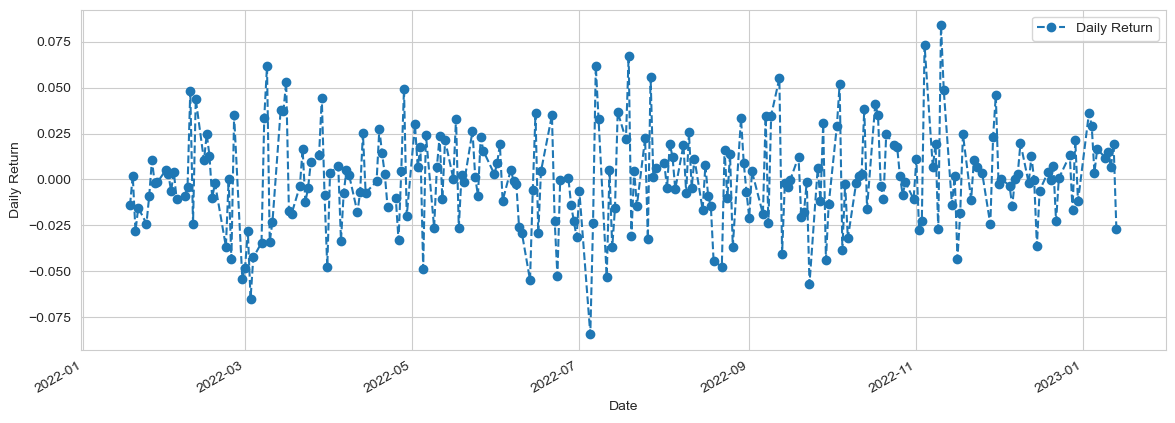

In [17]:
#Plotting the daily return
MBGAF['Daily Return'].plot(figsize=(14,5),legend=True,linestyle='--',marker='o')
plt.xlabel('Date')
plt.ylabel('Daily Return')

Text(0, 0.5, 'Frequency')

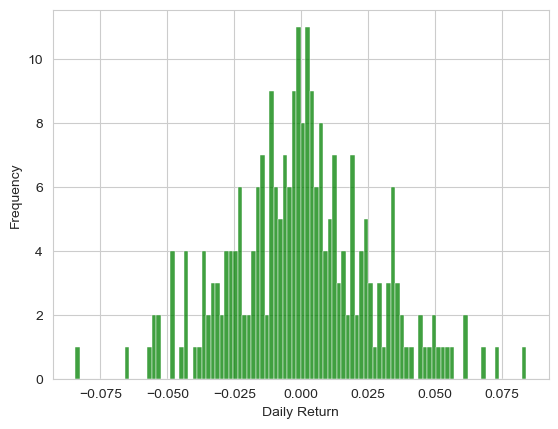

In [18]:
sns.histplot(x=MBGAF['Daily Return'].dropna(),bins=100,color='green')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')

### Question 2 (b) What was the correlation between daily returns of different stocks?

In [19]:
tickers_list = ['MBGAF','BMWYY','VWAGY','POAHY']
close_df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    close_df[ticker] = yf.download(ticker, 
                               start,
                               end)['Adj Close']
    
# Print first 5 rows of the data
close_df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,MBGAF,BMWYY,VWAGY,POAHY
Date,,,,
2022-01-14,78.894630,35.234741,27.095135,9.766303
2022-01-18,77.776932,34.733902,25.885759,9.582944
2022-01-19,77.943199,34.316540,25.894337,9.525041
2022-01-20,75.744759,33.593109,25.791410,9.457488
2022-01-21,74.580872,33.138645,25.028048,9.177624


In [20]:
close_df.tail()

,MBGAF,BMWYY,VWAGY,POAHY
Date,,,,
2023-01-09,72.000000,31.910000,17.150000,5.91
2023-01-10,73.070000,32.480000,17.125000,6.08
2023-01-11,73.559998,32.970001,17.455000,6.03
2023-01-12,74.959999,33.759998,17.850000,6.08
2023-01-13,72.949997,33.209999,17.450001,5.95


Everything works as expected.

Just as we did earlier, we can use Pandas' pct_change method to get the daily returns of our stocks.

In [21]:
rets_df = close_df.pct_change()

In [22]:
rets_df.tail()

,MBGAF,BMWYY,VWAGY,POAHY
Date,,,,
2023-01-09,0.011804,0.002198,0.004981,0.015464
2023-01-10,0.014861,0.017863,-0.001458,0.028765
2023-01-11,0.006706,0.015086,0.019270,-0.008224
2023-01-12,0.019032,0.023961,0.022630,0.008292
2023-01-13,-0.026814,-0.016291,-0.022409,-0.021382


Let's try creating a scatterplot to visualise any correlations between different stocks. First we'll visualise a scatterplot for the relationship between the daily return of a stock to itself.

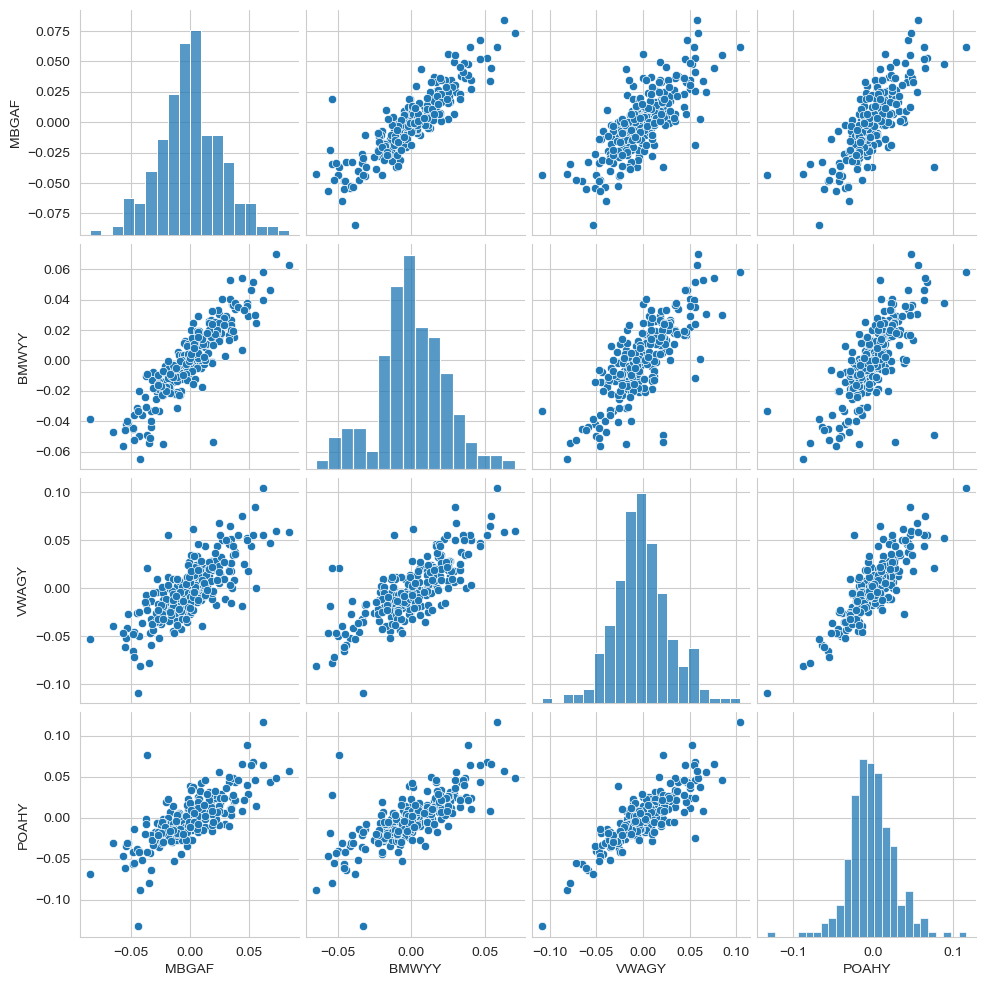

In [23]:
sns.pairplot(rets_df)

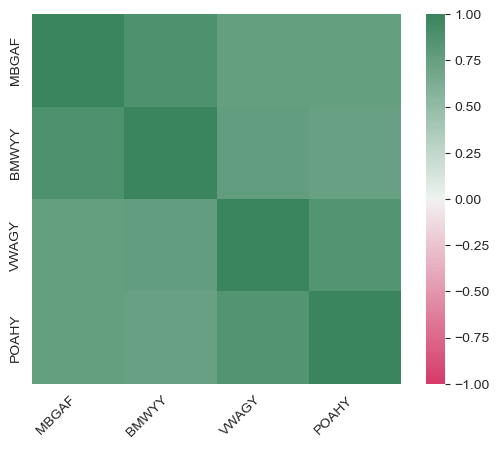

In [24]:
#Correlation matrix heatmap of the dataset

corr = rets_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 505, n=400),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In the above correlation heatmap, green indivates high correlation and red mean low correlation. we see all of them lies among the shaded of green which means all of them are quite correlated to each other. In simple terms, when value of one increases, the value of the other car increases too and vice-versa.

Observations-
-  We see BMWYY are highly correlated to MBGAF and VWAGY is highly correlated to POAHY in comparison to others.
-  Whereas MBGAF is least correlated to VWAGY and POAHY in comparison to others.

c:\Users\aiman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


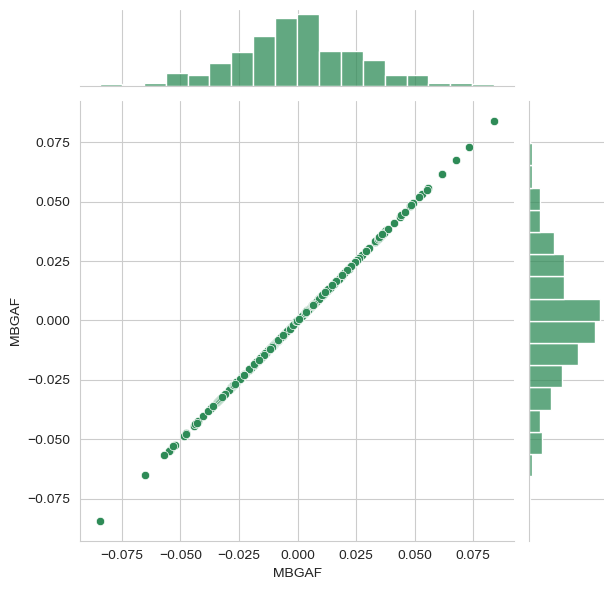

In [25]:
#sns.jointplot(rets_df,x='MBGAF',y='MBGAF',kind='scatter')
sns.jointplot('MBGAF','MBGAF',rets_df,kind='scatter',color='seagreen')

c:\Users\aiman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


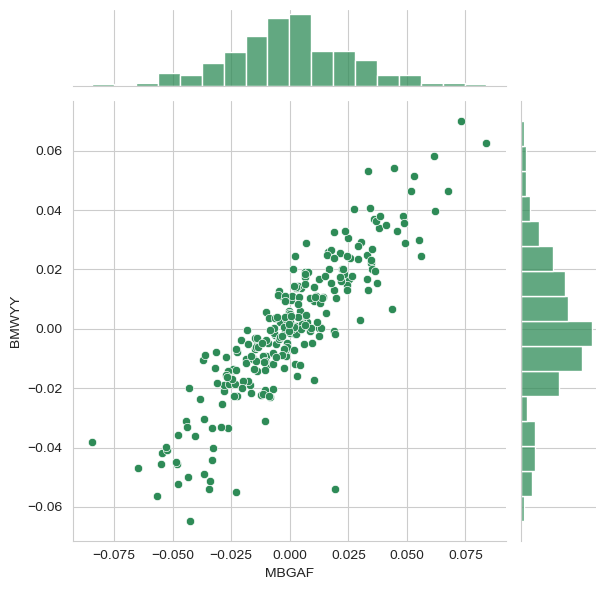

In [26]:
#sns.jointplot(rets_df,x='MBGAF',y='BMWYY',kind='scatter', color='purple')
sns.jointplot('MBGAF','BMWYY',rets_df,kind='scatter',color='seagreen')

<AxesSubplot:ylabel='Date'>

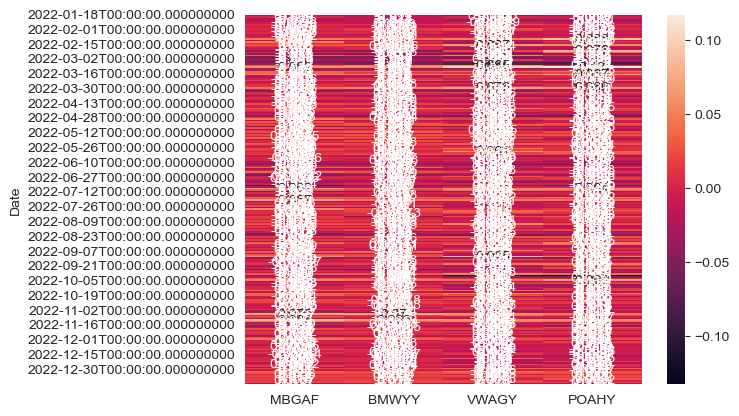

In [27]:
sns.heatmap(rets_df.dropna(),annot=True)

### Question 3 (a)  How much value do we put at risk by investing in a particular stock?

A basic way to quantify risk is to compare the expected return (which can be the mean of the stock's daily returns) with the standard deviation of the daily returns.

In [28]:
rets = rets_df.dropna()

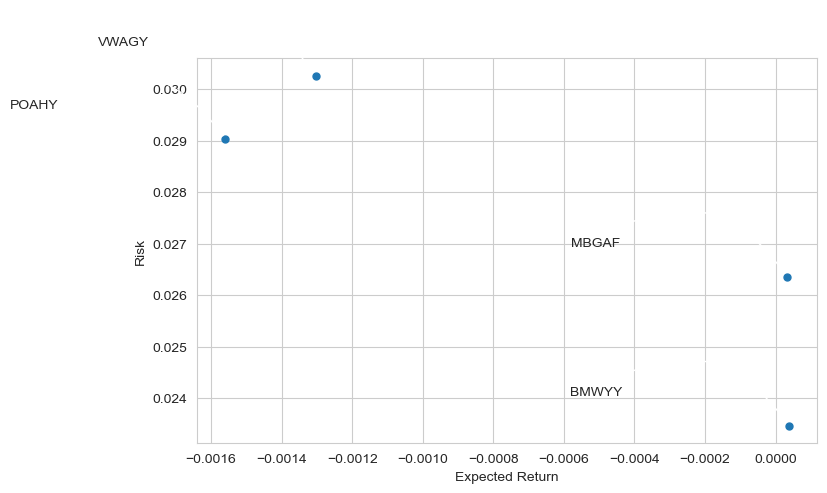

In [29]:
plt.figure(figsize=(8,5))

plt.scatter(rets.mean(),rets.std(),s=25)

plt.xlabel('Expected Return')
plt.ylabel('Risk')


#For adding annotatios in the scatterplot
for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(-120,20),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle='->',connectionstyle = 'arc3,rad=-0.5'))

#### Value at Risk
We can treat Value at risk as the amount of money we could expect to lose for a given confidence interval. We'll use the 'Bootstrap' method and the 'Monte Carlo Method' to extract this value.

#### Bootstrap Method

Using this method, we calculate the empirical quantiles from a histogram of daily returns. The quantiles help us define our confidence interval.

<AxesSubplot:xlabel='Daily Return', ylabel='Count'>

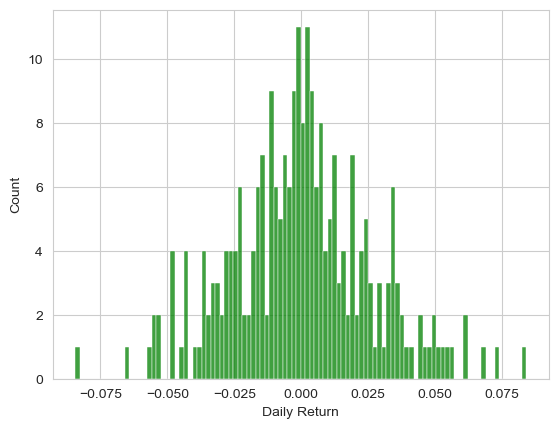

In [30]:
sns.histplot(x=MBGAF['Daily Return'].dropna(),bins=100,color='green')

In [31]:
rets.head()

,MBGAF,BMWYY,VWAGY,POAHY
Date,,,,
2022-01-18,-0.014167,-0.014214,-0.044634,-0.018775
2022-01-19,0.002138,-0.012016,0.000331,-0.006042
2022-01-20,-0.028206,-0.021081,-0.003975,-0.007092
2022-01-21,-0.015366,-0.013528,-0.029598,-0.029592
2022-01-24,-0.024028,-0.013994,-0.037526,-0.027340


In [32]:
#Using Pandas built in qualtile method
rets['MBGAF'].quantile(0.05)

-0.04351921794561522

### Question 3 (b) How can we attempt to predict future stock behaviour?

In [33]:
days = 365

#delta t
dt = 1/365

mu = rets.mean()['MBGAF']

sigma = rets.std()['MBGAF']

In [34]:
#Function takes in stock price, number of days to run, mean and standard deviation values
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        #Shock and drift formulas taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        #New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price

In [35]:
BMWYY.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-14,37.770000,38.090000,37.680000,37.990002,35.234741,41500
2022-01-18,37.759998,37.759998,37.349998,37.450001,34.733902,88400
2022-01-19,37.560001,37.560001,36.860001,37.000000,34.316540,58200
2022-01-20,36.490002,36.840000,36.189999,36.220001,33.593109,58900
2022-01-21,35.799999,36.200001,35.700001,35.730000,33.138645,39400


Text(0.5, 1.0, 'The Monte Carlo Analysis for Bayerische Motoren Werke Aktiengesellschaft (BMWYY')

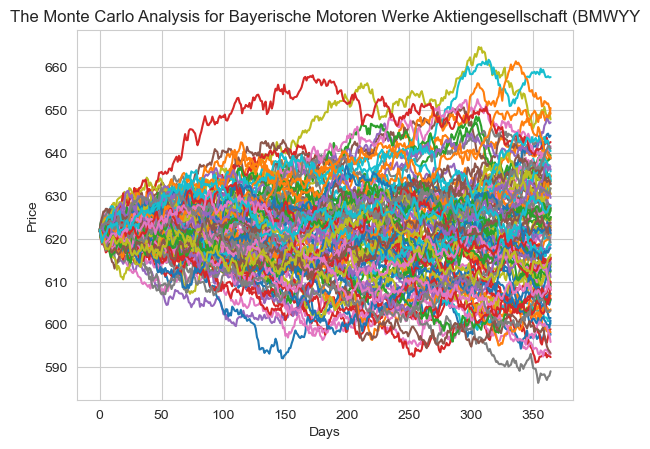

In [36]:
#Let's do a simulation of 100 runs, and plot them.

start_price = 622.049 #Taken from above

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('The Monte Carlo Analysis for Bayerische Motoren Werke Aktiengesellschaft (BMWYY')

In [37]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Bayerische Motoren Werke Aktiengesellschaft (BMWYY Stock after 365 days')

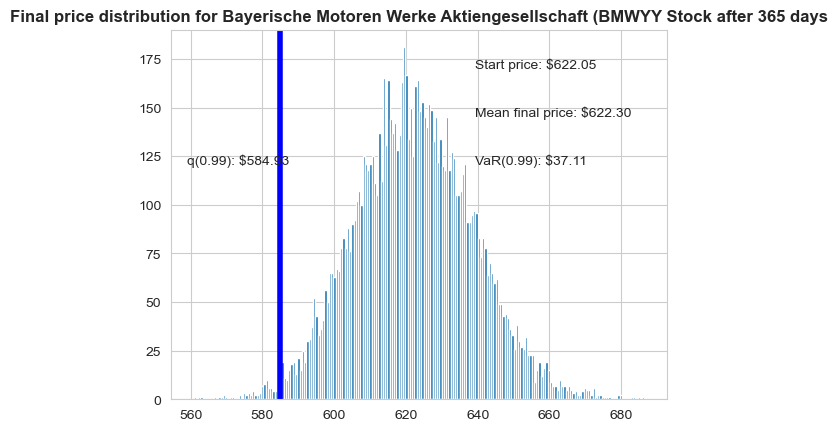

In [38]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

plt.figtext(0.6,0.7,"Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price -q,))

plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='b')

plt.title(u"Final price distribution for Bayerische Motoren Werke Aktiengesellschaft (BMWYY Stock after %s days" %days, weight='bold')

Predicting the closing price stock price of MBGAF

In [39]:
# Get the stock quote
df = pdr.get_data_yahoo('MBGAF', data_source='yahoo', start='2021-01-01', end=datetime.now())
# Show the data
df

TypeError: download() got an unexpected keyword argument 'data_source'

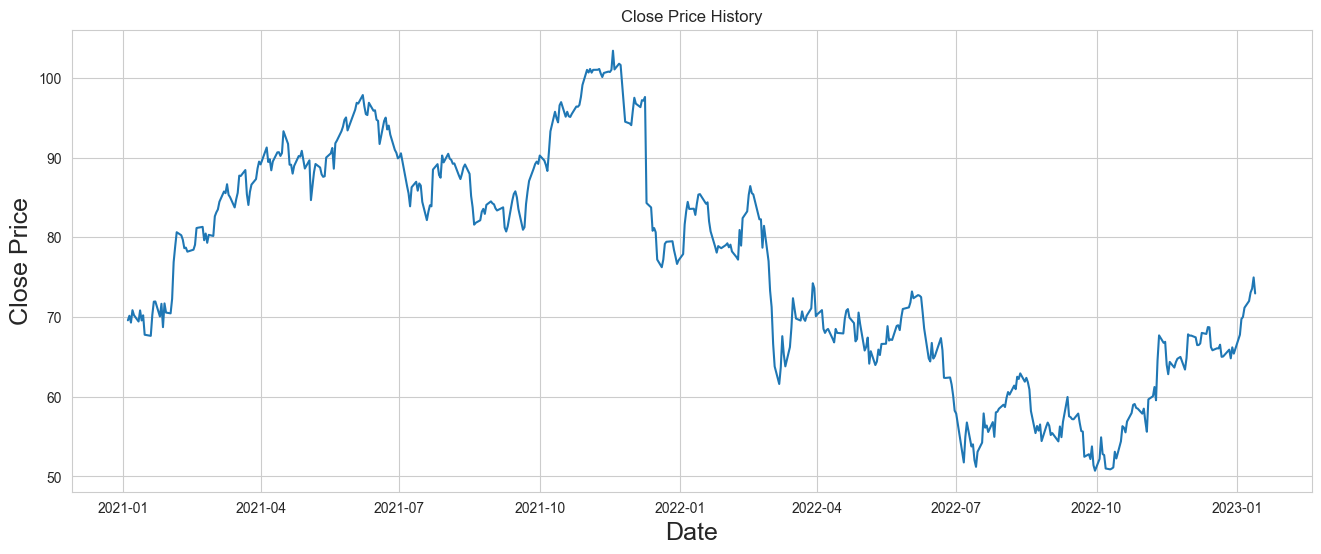

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

487

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.35813251],
       [0.36895049],
       [0.3526286 ],
       [0.38223569],
       [0.37027901],
       [0.35528564],
       [0.38166634],
       [0.35775285],
       [0.37008918],
       [0.32378054],
       [0.3211235 ],
       [0.37046884],
       [0.40254314],
       [0.4029228 ],
       [0.36705263],
       [0.39741889],
       [0.34181061],
       [0.39836775],
       [0.3765421 ],
       [0.37464409],
       [0.40937557],
       [0.49667863],
       [0.53387732],
       [0.56784963],
       [0.56063768],
       [0.55000953],
       [0.52989176],
       [0.53122028],
       [0.52154113],
       [0.52628586],
       [0.53786302],
       [0.57771875],
       [0.57866761],
       [0.58056562],
       [0.54887069],
       [0.56481307],
       [0.54260776],
       [0.56158669],
       [0.55892965],
       [0.60580749],
       [0.61529696],
       [0.62212938],
       [0.64034914],
       [0.66483198],
       [0.66084642],
       [0.68210288],
       [0.6570507 ],
       [0.651

In [ ]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.35813251, 0.36895049, 0.3526286 , 0.38223569, 0.37027901,
       0.35528564, 0.38166634, 0.35775285, 0.37008918, 0.32378054,
       0.3211235 , 0.37046884, 0.40254314, 0.4029228 , 0.36705263,
       0.39741889, 0.34181061, 0.39836775, 0.3765421 , 0.37464409,
       0.40937557, 0.49667863, 0.53387732, 0.56784963, 0.56063768,
       0.55000953, 0.52989176, 0.53122028, 0.52154113, 0.52628586,
       0.53786302, 0.57771875, 0.57866761, 0.58056562, 0.54887069,
       0.56481307, 0.54260776, 0.56158669, 0.55892965, 0.60580749,
       0.61529696, 0.62212938, 0.64034914, 0.66483198, 0.66084642,
       0.68210288, 0.6570507 , 0.65116713, 0.62687412, 0.64623271,
       0.66179543, 0.70260016, 0.70184099, 0.71588536, 0.65837921,
       0.63275768, 0.66369329, 0.68115388, 0.69443922, 0.71968109])]
[0.736002979358789]

[array([0.35813251, 0.36895049, 0.3526286 , 0.38223569, 0.37027901,
       0.35528564, 0.38166634, 0.35775285, 0.37008918, 0.32378054,
       0.3211235 , 0.37046884, 0.4025

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

427/427 [==============================] - 13s 22ms/step - loss: 0.0109


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 [==============================] - 1s 1s/step


2.845522246746626

C:\Users\GulleysIntl\AppData\Local\Temp\ipykernel_10416\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


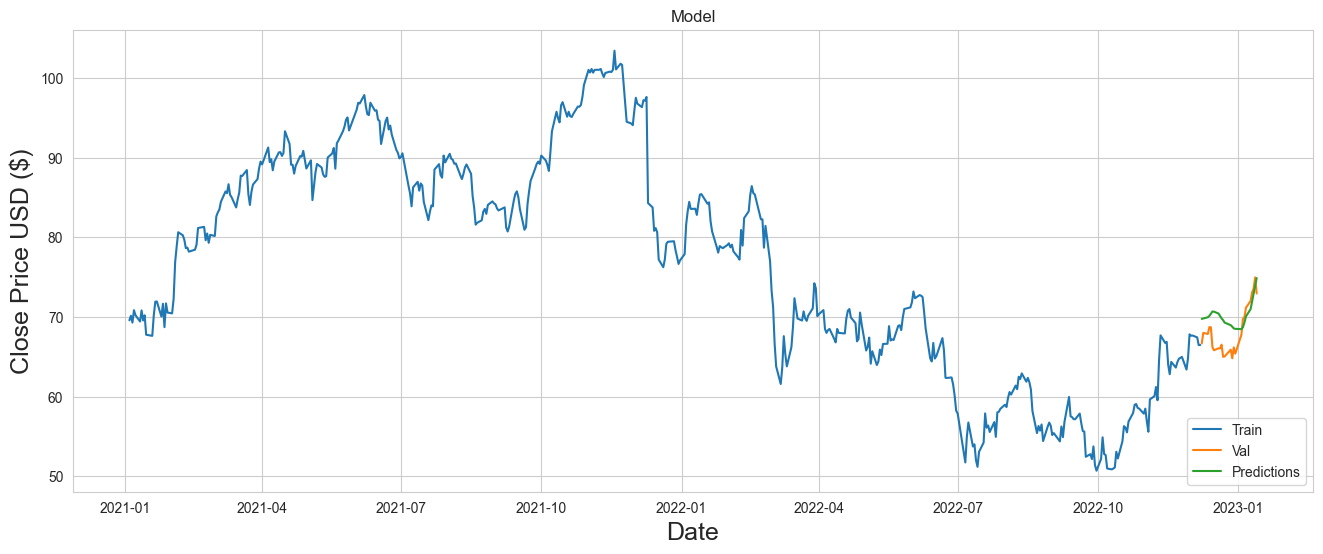

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2022-12-08,66.680000,69.755730
2022-12-09,68.000000,69.809639
2022-12-12,67.870003,69.961464
2022-12-13,68.730003,70.135681
2022-12-14,68.699997,70.402740
2022-12-15,66.220001,70.687340
2022-12-16,65.820000,70.664375
2022-12-19,66.070000,70.427681
2022-12-20,66.050003,70.125618
